# Import thư viện, các hàm cần thiết

In [1]:
from My_function_foody import *
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu quán ăn

In [2]:
file_path = "Data_tho.txt"
list_restaurant_data = read_dict_txt(file_path)

restaurant_overview = []
menu_items = []

for restaurant in list_restaurant_data:
    # Extract the overview details
    restaurant_overview.append({
        "Link": restaurant.get("Link"),
        "Image": restaurant.get("Image"),
        "Tên nhà hàng": restaurant.get("name"),
        "Loại hình": ", ".join(restaurant.get("categories", [])),
        "Phong cách món ăn": restaurant.get("cuisine"),
        "Đối tượng phù hợp": ", ".join(restaurant.get("audiences", [])),
        "Đánh giá trung bình": restaurant.get("ratings", {}).get("average_rating", None),
        "Tổng số bình luận": restaurant.get("comments", {}).get("total_comments", 0),
        "Bình luận tuyệt vời": restaurant.get("comments", {}).get("comment_ratings", {}).get("Tuyệt vời", 0),
        "Bình luận khá tốt": restaurant.get("comments", {}).get("comment_ratings", {}).get("Khá tốt", 0),
        "Bình luận trung bình": restaurant.get("comments", {}).get("comment_ratings", {}).get("Trung bình", 0),
        "Bình luận kém": restaurant.get("comments", {}).get("comment_ratings", {}).get("Kém", 0),
        "Điểm không gian": restaurant.get("ratings", {}).get("detailed_points", {}).get("Không gian", None),
        "Điểm vị trí": restaurant.get("ratings", {}).get("detailed_points", {}).get("Vị trí", None),
        "Điểm chất lượng": restaurant.get("ratings", {}).get("detailed_points", {}).get("Chất lượng", None),
        "Điểm phục vụ": restaurant.get("ratings", {}).get("detailed_points", {}).get("Phục vụ", None),
        "Điểm giá cả": restaurant.get("ratings", {}).get("detailed_points", {}).get("Giá cả", None),
        "Đường": restaurant.get("address", {}).get("street", None),
        "Quận": restaurant.get("address", {}).get("locality", None),
        "Thành phố": restaurant.get("address", {}).get("region", None),
        "Giờ mở cửa": restaurant.get("opening_hours", None),
        "Khoảng giá": restaurant.get("price_range", None)
    })
    
    for menu_item in restaurant.get("menu", []):
        menu_items.append({
            "Tên nhà hàng": restaurant.get("name"),
            "Tên món": menu_item.get("name"),
            "Giá": menu_item.get("price"),
            "Hình ảnh món ăn": menu_item.get("image_url")
        })

df_restaurant = pd.DataFrame(restaurant_overview)
df_menu = pd.DataFrame(menu_items)



- Dữ liệu được thu thập xong được tách thành 2 file là dữ liệu về menu của quán ăn đó và dữ liệu về thông tin quán ăn đó. 

In [3]:
df_restaurant.head(5)

,Link,Image,Tên nhà hàng,Loại hình,Phong cách món ăn,Đối tượng phù hợp,Đánh giá trung bình,Tổng số bình luận,Bình luận tuyệt vời,Bình luận khá tốt,...,Điểm không gian,Điểm vị trí,Điểm chất lượng,Điểm phục vụ,Điểm giá cả,Đường,Quận,Thành phố,Giờ mở cửa,Khoảng giá
0,https://www.foody.vn/ha-noi/jacksons-steakhouse,https://down-vn.img.susercontent.com/vn-111342...,Jacksons Steakhouse Hanoi,"Sang trọng,, Nhà hàng",Mỹ,"Cặp đôi, Giới văn phòng, Giới Manager",6.7,533,150,53,...,6.8,6.7,6.8,6.8,6.6,"23J Hai Bà Trưng, P. Hàng Bài",Quận Hoàn Kiếm,Hà Nội,09:30 - 23:30,300.000đ - 1.100.000đ
1,https://www.foody.vn/ha-noi/salmonoid-cao-ba-quat,https://down-vn.img.susercontent.com/vn-111342...,Salmonoid - Món Âu - Cao Bá Quát,"Sang trọng,, Nhà hàng",Pháp,"Cặp đôi, Gia đình, Giới Manager",7.5,271,47,159,...,7.7,7.6,7.8,7.7,7.1,32C Cao Bá Quát,Quận Ba Đình,Hà Nội,10:00 - 22:30,200.000đ - 650.000đ
2,https://www.foody.vn/ha-noi/essence-cafe,https://down-vn.img.susercontent.com/vn-111342...,Essence Cafe & Restaurant,"Sang trọng,, Nhà hàng,, Café/Dessert",Món Việt,"Cặp đôi, Gia đình, Nhóm hội, Khách du lịch",6.5,192,50,10,...,6.5,6.6,6.5,6.5,6.5,22 Tạ Hiện,Quận Hoàn Kiếm,Hà Nội,,60.000đ - 132.000đ
3,https://www.foody.vn/ha-noi/tim-ho-wan-dim-sum...,https://down-vn.img.susercontent.com/vn-111342...,Tim Ho Wan - Dimsum Hồng Kông - Lotte Hotel Hanoi,"Sang trọng,, Nhà hàng",Món Trung Hoa,"Cặp đôi, Gia đình, Nhóm hội, Giới văn phòng, K...",7.9,131,26,89,...,8.5,8.6,7.7,7.9,6.9,"Tầng 36, Lotte Center, 54 Liễu Giai",Quận Ba Đình,Hà Nội,11:30 - 22:00,100.000đ - 1.000.000đ
4,https://www.foody.vn/ha-noi/tunglok-heen-am-th...,https://down-vn.img.susercontent.com/vn-111342...,Tunglok Heen - Ẩm Thực Trung Hoa - Almaz Vinho...,"Sang trọng,, Nhà hàng",Món Trung Hoa,"Nhóm hội, Giới văn phòng, Khách du lịch",7.6,56,18,20,...,8.1,7.2,7.9,7.9,6.8,"Almaz, Vinhomes Riverside",Quận Long Biên,Hà Nội,10:00 - 15:00 | 18:00 - 22:00,250.000đ - 5.000.000đ


In [4]:
rows, cols = df_restaurant.shape
print(f"Dữ liệu có tổng cộng {rows:,} nhà hàng, với {cols} trường thông tin được thu thập.")

Dữ liệu có tổng cộng 2,977 nhà hàng, với 22 trường thông tin được thu thập.


In [5]:
df_menu.head()

,Tên nhà hàng,Tên món,Giá,Hình ảnh món ăn
0,Top Floor Rue Des Seaux Restaurant - Hàng Thùng,Sườn Nướng Tảng Sốt Mật Ong Vừng (1kg),350.000đ,https://mms.img.susercontent.com/vn-11134517-7...
1,Top Floor Rue Des Seaux Restaurant - Hàng Thùng,Salad Caeser Với Gà Nướng,100.000đ,https://mms.img.susercontent.com/vn-11134517-7...
2,Top Floor Rue Des Seaux Restaurant - Hàng Thùng,Cơm Rang Dứa,115.000đ,https://mms.img.susercontent.com/vn-11134517-7...
3,Top Floor Rue Des Seaux Restaurant - Hàng Thùng,Mỳ Ý Sốt Bolognese,115.000đ,https://mms.img.susercontent.com/vn-11134517-7...
4,Top Floor Rue Des Seaux Restaurant - Hàng Thùng,Cơm Sườn Nướng Sốt Mật Ong Vừng,150.000đ,https://mms.img.susercontent.com/vn-11134517-7...


In [6]:
rows, cols = df_menu.shape
print(f"Dữ liệu bảng menu có tổng cộng {rows:,} , với {cols} trường thông tin được thu thập.")


Dữ liệu bảng menu có tổng cộng 16,103 , với 4 trường thông tin được thu thập.


In [7]:
df_menu.to_csv("menu.csv", index=False)


# Làm sạch dữ liệu nhà hàng

### Kiểm tra lỗi trùng lặp

In [8]:
print("Số các bản ghi bị trùng lặp:", df_restaurant.duplicated().sum())

Số các bản ghi bị trùng lặp: 0


### Xóa các bản ghi bị trùng lặp

In [9]:
df_restaurant.drop_duplicates(inplace= True, keep= "first")

### Kiểm tra giá trị rỗng

In [10]:
df_restaurant.isna().sum()

Link                      0
Image                     0
Tên nhà hàng              7
Loại hình                 0
Phong cách món ăn       388
Đối tượng phù hợp         0
Đánh giá trung bình     485
Tổng số bình luận         0
Bình luận tuyệt vời       0
Bình luận khá tốt         0
Bình luận trung bình      0
Bình luận kém             0
Điểm không gian         485
Điểm vị trí             485
Điểm chất lượng         485
Điểm phục vụ            485
Điểm giá cả             485
Đường                     7
Quận                      7
Thành phố                 7
Giờ mở cửa                7
Khoảng giá              402
dtype: int64

- Có thể thấy dữ liệu có một bản ghi bị lỗi không có dữ liệu về tên nhà hàng vì thế ta chọn các xóa bản ghi này đi  
- Ngoài ra các bản ghi khác có giá trị null ở các cột như Phong các món ăn, Điểm giá trung bình,..... đều là do các nhà hàng này trên web không có dữ liệu. Vì thế ở các thuộc tính có giá trị là số tôi sẽ xử lý bằng cách thay thế bằng giá trị 0, còn các trường khác sẽ được thay thế bằng chuỗi rỗng

In [11]:
# Xóa bản ghi bị None ở thuộc tính Tên nhà hàng
df = df_restaurant.dropna(subset=["Tên nhà hàng"])

In [12]:
# Xử lý các cột số: thay NaN bằng 0
numeric_columns = df.select_dtypes(include=["number"]).columns
df.loc[:, numeric_columns] = df[numeric_columns].fillna(0)

# Xử lý các cột chuỗi: thay NaN bằng chuỗi rỗng
string_columns = ["Phong cách món ăn", "Khoảng giá"]
df.loc[:, string_columns] = df[string_columns].fillna("")


In [13]:
# Kiểm tra lại
df.isna().sum()

Link                    0
Image                   0
Tên nhà hàng            0
Loại hình               0
Phong cách món ăn       0
Đối tượng phù hợp       0
Đánh giá trung bình     0
Tổng số bình luận       0
Bình luận tuyệt vời     0
Bình luận khá tốt       0
Bình luận trung bình    0
Bình luận kém           0
Điểm không gian         0
Điểm vị trí             0
Điểm chất lượng         0
Điểm phục vụ            0
Điểm giá cả             0
Đường                   0
Quận                    0
Thành phố               0
Giờ mở cửa              0
Khoảng giá              0
dtype: int64

### Kiểm tra lỗi logic

In [14]:
# Kiểm tra xem có điểm đánh giá nào lớn hơn 10 hoặc nhỏ hơn 0 không
columns_to_check = pd.concat([df.iloc[:, [6]], df.iloc[:, 12:17]], axis=1)
invalid_values = columns_to_check[(columns_to_check < 0) | (columns_to_check > 10)].stack()

# Kết quả
invalid_values

Series([], dtype: float64)

Không thấy có bất kỳ trường hợp bất thường nào về điểm đánh giá. Vì thế có thể nói dữ liệu không có bất kì bất thường nào về giá trị ngoại lai.

### Thực hiện Kiểm tra các giá trị trong từng thuộc tính

##### Cột Loại Hình

In [15]:
Loai_hinh = df["Loại hình"].value_counts().to_dict()

In [16]:
normalized_Loai_hinh = defaultdict(int)

for key, value in Loai_hinh.items():

    types = [x.strip() for x in key.split(',,')]
    for t in types:
        normalized_Loai_hinh[t] += value

normalized_Loai_hinh = dict(sorted(normalized_Loai_hinh.items(), key=lambda x: x[1], reverse=True))

print(normalized_Loai_hinh)

{'Quán ăn': 773, 'Nhà hàng': 553, 'Ăn vặt/vỉa hè': 506, 'Café/Dessert': 344, 'Ăn chay': 276, 'Tiệm bánh': 251, 'Buffet': 155, 'Shop Online': 149, 'Sang trọng': 97, 'Giao cơm văn phòng': 71, 'Quán nhậu': 59, 'Beer club': 54, 'Bar/Pub': 52, 'Khu Ẩm Thực': 50, 'Tiệc tận nơi': 34, 'Tiệc cưới/Hội nghị': 12, 'Shop/Cửa hàng': 8, 'Khách sạn': 4, 'Chợ': 2, 'Mua sắm Online': 2, 'Karaoke': 2, 'Thăm quan & chụp ảnh': 1, 'Billiards': 1, 'Sân khấu': 1, 'Khu chơi Game': 1, 'Bank - ATM': 1, 'Khu nghỉ dưỡng': 1, 'Siêu thị': 1, 'Trung tâm thương mại': 1, 'Nhà nghỉ': 1}


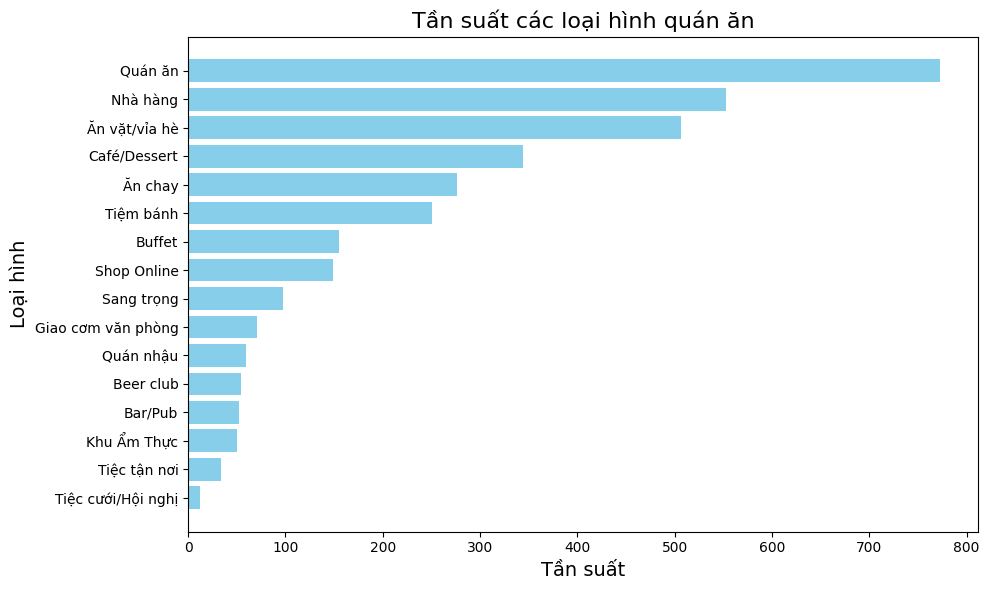

In [17]:
filtered_data = {k: v for k, v in normalized_Loai_hinh.items() if v >= 10}

# Chuyển đổi thành danh sách
categories = list(filtered_data.keys())
frequencies = list(filtered_data.values())

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(categories, frequencies, color='skyblue')
plt.xlabel('Tần suất', fontsize=14)
plt.ylabel('Loại hình', fontsize=14)
plt.title('Tần suất các loại hình quán ăn', fontsize=16)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

- Loại hình địa điểm ăn uống & dịch vụ

  - Dữ liệu bao gồm 30 loại hình, với tổng cộng 3,459 địa điểm.

  - Các loại hình phổ biến nhất:
    - Quán ăn (773 địa điểm)
    - Nhà hàng (553)
    - Ăn vặt/vỉa hè (506)
    - Café/Dessert (344)
    - Ăn chay, Tiệm bánh, Buffet đều trên 100 địa điểm

  - Những loại hình có số lượng thấp (<10 địa điểm) như:
    Karaoke, Billiards, Sân khấu, Khu chơi Game, Bank - ATM, Khách sạn, Nhà nghỉ, Khu nghỉ dưỡng, Siêu thị, Chợ, Trung tâm thương mại, Mua sắm Online,...

    → Cần được gộp nhóm lại để dễ quản lý và phân tích.


In [ ]:
group_mapping = {
    "Khu vui chơi / Giải trí": [
        "Karaoke", "Billiards", "Khu chơi Game", "Sân khấu", "Thăm quan & chụp ảnh"
    ],
    "Lưu trú / Nghỉ dưỡng": [
        "Khách sạn", "Nhà nghỉ", "Khu nghỉ dưỡng"
    ],
    "Dịch vụ - Mua sắm": [
        "Shop/Cửa hàng", "Siêu thị", "Chợ", "Trung tâm thương mại", "Mua sắm Online", "Bank - ATM"
    ],
    "Tiệc & Sự kiện": [
        "Tiệc cưới/Hội nghị", "Tiệc tận nơi"
    ]
}

def replace_with_grouped_categories(original_categories):
    if isinstance(original_categories, str):
        original_categories = [x.strip().strip(",") for x in original_categories.split(",,") if x.strip()]
    elif not isinstance(original_categories, list):
        return ""

    cleaned = [c.strip().strip(",") for c in original_categories if isinstance(c, str) and c]
    replaced = set()
    remaining = set(cleaned)

    for group_name, group_items in group_mapping.items():
        found = set(group_items) & remaining
        if found:
            remaining -= found
            replaced.add(group_name)

    final = list(remaining | replaced)
    return ", ".join(final)  

df = df.copy()
df["Loại hình"] = df["Loại hình"].apply(replace_with_grouped_categories)

##### Trực quan hóa dữ liệu

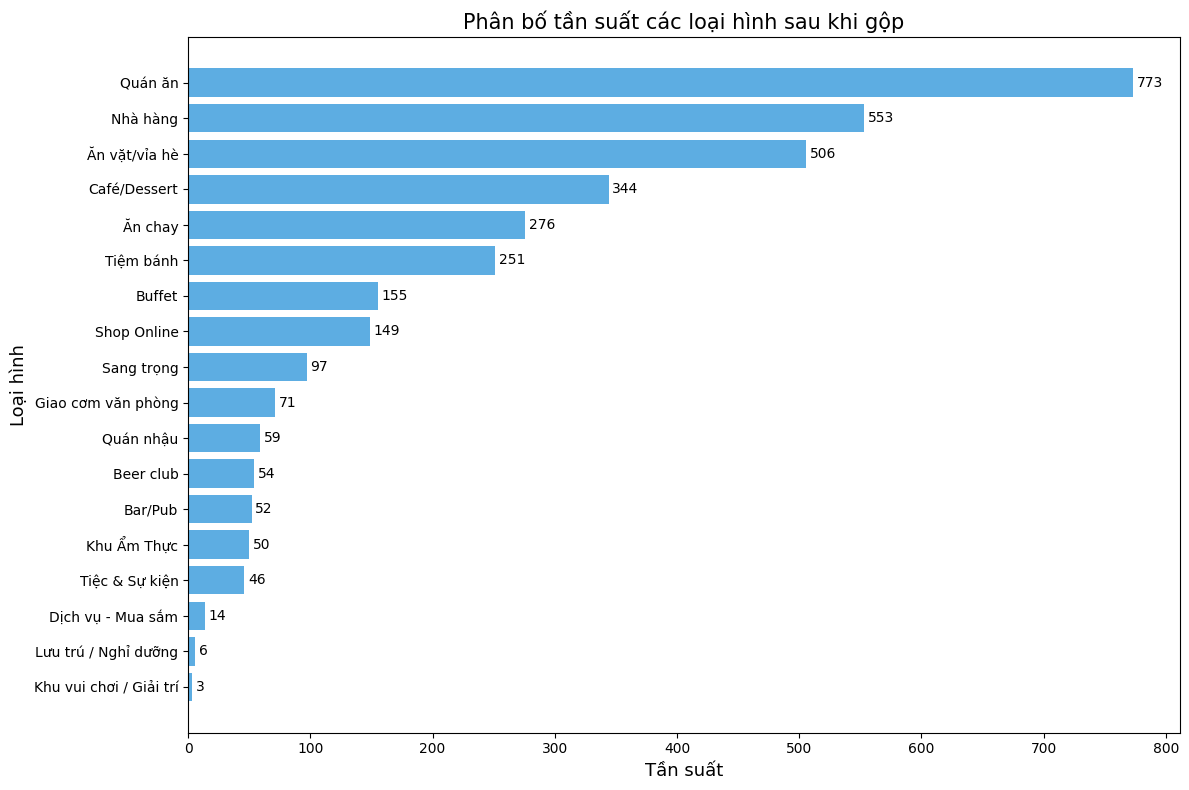

In [19]:
from collections import defaultdict, Counter
from itertools import chain


all_categories = list(chain.from_iterable(
    [x.split(", ") if isinstance(x, str) else [] for x in df["Loại hình"]]
))

# Bước 3: Đếm số lần xuất hiện
normalized_Loai_hinh = dict(Counter(all_categories))

# Bước 4: Sắp xếp theo tần suất giảm dần
normalized_Loai_hinh = dict(sorted(normalized_Loai_hinh.items(), key=lambda x: x[1], reverse=True))

# Bước 5: Trực quan hóa
plt.figure(figsize=(12, 8))
categories = list(normalized_Loai_hinh.keys())
frequencies = list(normalized_Loai_hinh.values())

bars = plt.barh(categories, frequencies, color='#5DADE2')
plt.gca().invert_yaxis()

plt.xlabel("Tần suất", fontsize=13)
plt.ylabel("Loại hình", fontsize=13)
plt.title("Phân bố tần suất các loại hình sau khi gộp", fontsize=15)

# Hiển thị giá trị trên từng cột
for bar in bars:
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2,
             str(bar.get_width()), va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### Các đối tượng phù hợp

In [20]:
Doi_tuong = df["Đối tượng phù hợp"].value_counts().to_dict()

In [21]:
normalized_Doi_tuong = defaultdict(int)

for key, value in Doi_tuong.items():

    types = [x.strip() for x in key.split(',')]
    for t in types:
        normalized_Doi_tuong[t] += value

normalized_Doi_tuong = dict(sorted(normalized_Doi_tuong.items(), key=lambda x: x[1], reverse=True))
if '' in normalized_Doi_tuong:
    normalized_Doi_tuong['Không xác định'] = normalized_Doi_tuong.pop('')

normalized_Doi_tuong = dict(sorted(normalized_Doi_tuong.items(), key=lambda x: x[1], reverse=True))
normalized_Doi_tuong

{'Nhóm hội': 1872,
 'Gia đình': 1856,
 'Giới văn phòng': 1412,
 'Cặp đôi': 1229,
 'Sinh viên': 855,
 'Không xác định': 551,
 'Khách du lịch': 236,
 'Giới Manager': 209,
 'Trẻ em': 138}

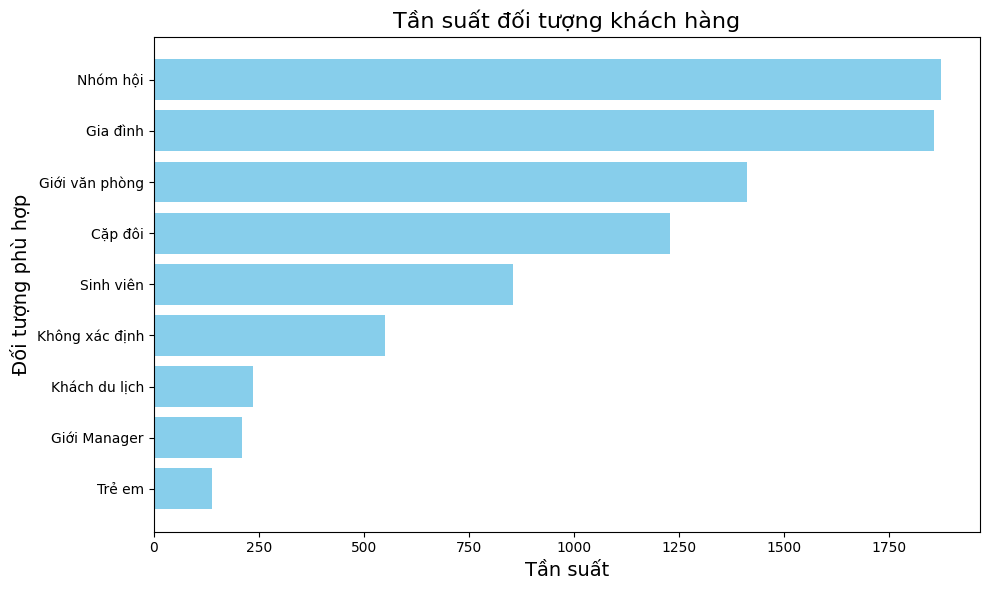

In [26]:
# Chuyển đổi thành danh sách
categories = list(normalized_Doi_tuong.keys())
frequencies = list(normalized_Doi_tuong.values())

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(categories, frequencies, color='skyblue')
plt.xlabel('Tần suất', fontsize=14)
plt.ylabel('Đối tượng phù hợp', fontsize=14)
plt.title('Tần suất đối tượng khách hàng', fontsize=16)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Kiểm tra phân bố của điểm đánh giá

###

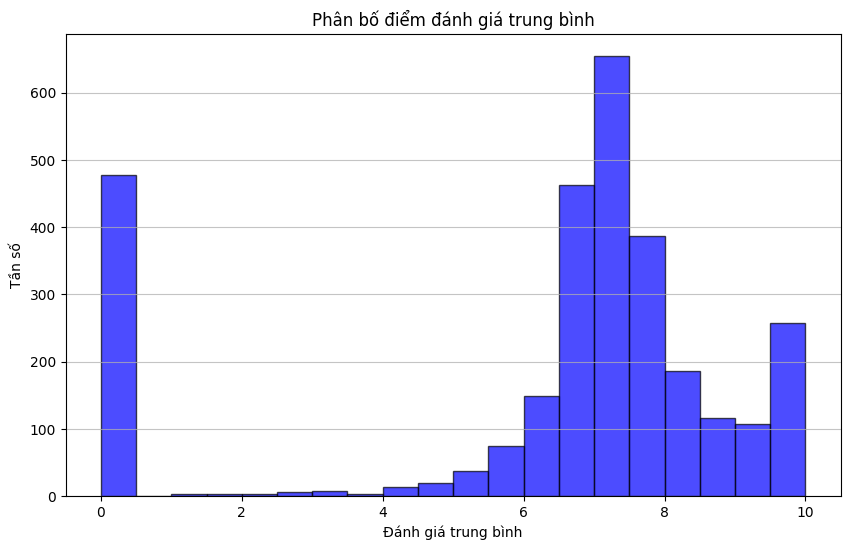

In [27]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.hist(df["Đánh giá trung bình"], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("Phân bố điểm đánh giá trung bình")
plt.xlabel("Đánh giá trung bình")
plt.ylabel("Tần số")
plt.grid(axis='y', alpha=0.75)

# Hiển thị biểu đồ
plt.show()



 Nhận định từ biểu đồ phân bố điểm đánh giá trung bình:

  - Phần lớn các quán ăn có điểm đánh giá trung bình nằm trong khoảng từ 6 đến 9 điểm, trong đó đỉnh rơi vào khoảng 7 điểm. Điều này cho thấy đa số các quán có chất lượng tương đối ổn định và được người dùng đánh giá tích cực.

  - Có một lượng rất lớn quán ăn có điểm đánh giá bằng 0. Đây là các quán chưa có đánh giá nào từ người dùng, thường là quán mới hoặc chưa có tương tác trên nền tảng. Cần xử lý dữ liệu này cẩn thận vì không phản ánh chất lượng thực tế.

  - Các quán có điểm dưới 5 là rất ít, điều này phản ánh hành vi người dùng thường ít đánh giá tiêu cực, hoặc các quán có chất lượng thấp đã không còn tồn tại trên hệ thống.


### Kiểm tra phong cách món ăn

In [28]:
df["Phong cách món ăn"].value_counts().to_dict()

{'Món Việt': 1327,
 '': 381,
 'Quốc tế': 198,
 'Món Bắc': 172,
 'Món Hàn': 161,
 'Hà Nội': 148,
 'Món Á': 130,
 'Món Nhật': 115,
 'Đài Loan': 68,
 'Pháp': 44,
 'Món Trung Hoa': 32,
 'Món Thái': 27,
 'Món Miền Nam': 25,
 'Mỹ': 20,
 'Món Âu': 20,
 'Ý': 19,
 'Món Miền Trung': 15,
 'Singapore': 14,
 'Món Quảng': 9,
 'Châu Mỹ': 7,
 'Món Ấn Độ': 7,
 'Món Huế': 7,
 'Đặc biệt': 6,
 'Malaysia': 5,
 'Nha Trang': 4,
 'Đông Âu': 1,
 'Bánh Pizza': 1,
 'Tây Bắc': 1,
 'Thổ Nhĩ Kỳ': 1,
 'Tiệp (Séc)': 1,
 'Miền Tây': 1,
 'Brazil': 1,
 'Úc': 1,
 'Trung Đông': 1}

In [29]:
group_mapping = {
    "Món Âu": ["Đông Âu", "Bánh Pizza", "Thổ Nhĩ Kỳ", "Tiệp (Séc)"],
    "Mỹ": ["Brazil"],
    "Quốc tế": ["Úc"],
    "Món Á": ["Trung Đông"],
    "Món Việt": ["Tây Bắc", "Miền Tây"]
}
def map_cuisine_group(cuisine):
    if cuisine == '' or pd.isna(cuisine):
        return cuisine  # giữ nguyên giá trị rỗng/NaN
    for group, items in group_mapping.items():
        if cuisine.strip() in items:
            return group
    return cuisine


In [30]:
df["Phong cách món ăn"] = df["Phong cách món ăn"].apply(map_cuisine_group)


### Kiểm tra dữ liệu thiếu 3 thuộc tính Phong cách món ăn, Loại hình và đánh giá trung bình

In [31]:
missing_values_df = df[
    (df["Phong cách món ăn"].isna()) &
    (df["Đối tượng phù hợp"].isna()) &
    (df["Đánh giá trung bình"] == 0)
]


In [32]:
missing_values_df.shape

(0, 22)

- Không có nhà hàng nào thiếu cả 3 giá trị của thuộc tính này. Nhưng trong cột Phong cách món ăn có 381 nhà hàng có giá trị là ''. Kiểm tra? và đưa ra cách khắc phục. 

In [33]:
df[df["Phong cách món ăn"] == ""].head()

,Link,Image,Tên nhà hàng,Loại hình,Phong cách món ăn,Đối tượng phù hợp,Đánh giá trung bình,Tổng số bình luận,Bình luận tuyệt vời,Bình luận khá tốt,...,Điểm không gian,Điểm vị trí,Điểm chất lượng,Điểm phục vụ,Điểm giá cả,Đường,Quận,Thành phố,Giờ mở cửa,Khoảng giá
34,https://www.foody.vn/ha-noi/ham-ruou-il-vino-m...,https://down-vn.img.susercontent.com/vn-111342...,Hầm Rượu Il Vino - My Way Hotel,"Bar/Pub, Sang trọng",,"Gia đình, Giới văn phòng, Giới Manager",6.8,15,3,5,...,7.1,6.7,6.9,6.8,6.3,"My Way Hotel, 2 Ngõ 86 Duy Tân",Quận Cầu Giấy,Hà Nội,08:00 - 22:00,1.000.000đ - 10.000.000đ
36,https://www.foody.vn/ha-noi/milan-restaurant-i...,https://down-vn.img.susercontent.com/vn-111342...,Milan Restaurant - InterContinental Hanoi West...,Sang trọng,,"Cặp đôi, Gia đình, Nhóm hội, Giới văn phòng",8.7,3,2,1,...,8.3,9.7,9.3,8.7,7.3,"InterContinental Hanoi Hotel, 5 Từ Hoa, P. Quả...",Quận Tây Hồ,Hà Nội,18:00 - 22:30,1.000.000đ - 10.000.000đ
37,https://www.foody.vn/ha-noi/cafe-du-lac-interc...,https://down-vn.img.susercontent.com/vn-111342...,Cafe Du Lac - InterContinental Hanoi Westlake,"Café/Dessert, Sang trọng",,"Cặp đôi, Gia đình, Nhóm hội, Giới văn phòng",7.7,6,1,4,...,8.0,7.8,8.0,8.0,6.7,"InterContinental Hanoi Hotel, 5 Từ Hoa, P. Quả...",Quận Tây Hồ,Hà Nội,12:00 - 15:00 | 18:00 - 21:30,100.000đ - 250.000đ
44,https://www.foody.vn/ha-noi/diplomat-lounge-in...,https://down-vn.img.susercontent.com/vn-111342...,Diplomat Lounge - InterContinental Hanoi Westlake,Sang trọng,,"Cặp đôi, Gia đình, Nhóm hội, Giới văn phòng",6.3,3,0,1,...,6.7,6.7,6.3,6.3,5.3,"InterContinental Hanoi Hotel, 5 Từ Hoa",Quận Tây Hồ,Hà Nội,07:00 - 11:00,100.000đ - 2.000.000đ
47,https://www.foody.vn/ha-noi/nem-chua-ran-36-ta...,https://down-vn.img.susercontent.com/vn-111342...,Nem Chua Rán 36 Tạm Thương - Nguyễn Văn Giáp,Sang trọng,,,10.0,1,1,0,...,10.0,10.0,10.0,10.0,10.0,154 Nguyễn Văn Giáp,Quận Nam Từ Liêm,Hà Nội,10:00 - 22:00,5.000đ - 100.000đ


In [34]:
df["Phong cách món ăn"] = df["Phong cách món ăn"].replace('', np.nan)

# Bước 2: Điền theo mode trong từng nhóm loại hình
df.loc[:, "Phong cách món ăn"] = df.groupby("Loại hình")["Phong cách món ăn"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Không xác định")
)

### Thực hiện việc đánh ID nhà hàng

In [35]:
df['Restaurant ID'] = (
    df.groupby(['Tên nhà hàng', 'Link']).ngroup() + 1
)

# Thực hiện lưu trữ dữ liệu

In [36]:
df.to_csv("restaurant_data.csv", index=False)

# Đọc dữ liệu user đánh giá người dùng.

In [37]:
def parse_foody_file_safe(filepath):
    """
    Đọc file txt và trích xuất các trường quan trọng thành DataFrame.
    """
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    # Tách mỗi bình luận
    raw_comments = content.strip().split('================================================================================')

    data = []
    for comment in raw_comments:
        lines = comment.strip().split('\n')
        temp = {
            'Tên người dùng': None,
            'Link profile': None,
            'Avatar': None,
            'Điểm đánh giá': None,
            'Thời gian': None,
            'Thiết bị': None,
            'Nội dung bình luận': None,
            'Link quán': None
        }
        for line in lines:
            for key in temp.keys():  # Kiểm tra key có trong các trường chuẩn
                if line.lower().startswith(key.lower()):
                    value = line.split(':', 1)[1].strip() if ':' in line else None
                    temp[key] = value
        # Bỏ qua bình luận thiếu thông tin quan trọng (nếu muốn)
        if temp['Tên người dùng'] and temp['Nội dung bình luận']:
            data.append(temp)
    return pd.DataFrame(data)


In [38]:
file_path = r'D:\Khóa luận tốt nghiệp\crawldata\userdanhgias.txt'

In [39]:
df_user = parse_foody_file_safe(file_path)


In [40]:
df_user

,Tên người dùng,Link profile,Avatar,Điểm đánh giá,Thời gian,Thiết bị,Nội dung bình luận,Link quán
0,Trà My,https://www.foody.vn/thanh-vien/foodee_s5fjg0b3,https://images.foody.vn/usr/g5646/56452113/avt...,5.0,27/9/2024 18:20,via Android,5 sao,https://www.foody.vn/ha-noi/jacksons-steakhouse
1,Hồng Trần,https://www.foody.vn/thanh-vien/foodee_cv6fbdb9,https://images.foody.vn/usr/g5646/56450934/avt...,10,27/9/2024 15:22,via Android,Đồ ăn ngon hợp vệ sinh giá cả phải chăng,https://www.foody.vn/ha-noi/jacksons-steakhouse
2,foodee_hsr9f2vg,https://www.foody.vn/thanh-vien/foodee_hsr9f2vg,https://images.foody.vn/default/s40/user-defau...,10,26/9/2024 15:27,via iPhone,"đồ ăn ngon ,nhân viên phục vụ nhiệt tình ạ",https://www.foody.vn/ha-noi/jacksons-steakhouse
3,Thuý Vân,https://www.foody.vn/thanh-vien/foodee_hgvsse2l,https://images.foody.vn/default/s40/user-defau...,10,26/9/2024 15:23,via iPhone,"Không gian thoáng, sạch đệp, nhân viên lịch sự...",https://www.foody.vn/ha-noi/jacksons-steakhouse
4,Phạm Thị lành,https://www.foody.vn/thanh-vien/foodee_ehidbe1p,https://images.foody.vn/default/s40/user-defau...,10,25/9/2024 16:35,via Android,Dịch vụ rất tốt rất ok,https://www.foody.vn/ha-noi/jacksons-steakhouse
...,...,...,...,...,...,...,...,...
71172,Đinh Thị Thúy,https://www.foody.vn/thanh-vien/foodee_eq3lyhcv,https://images.foody.vn/usr/g5561/55606506/avt...,10,25/4/2024 7:53,via Web,Nước dùng trong bát mì hải sản thơm ngon...,https://www.foody.vn/ha-noi/bun-hai-san-68-ngo...
71173,Lê Văn Việt,https://www.foody.vn/thanh-vien/foodee_0r4xu5o0,https://images.foody.vn/usr/g5561/55605320/avt...,10,24/4/2024 8:47,via Web,Ăn một suất bún chả đặc biệt thoải mái...,https://www.foody.vn/ha-noi/bun-hai-san-68-ngo...
71174,Đinh Ngọc Minh,https://www.foody.vn/thanh-vien/foodee_i0y0mdkb,https://images.foody.vn/usr/g5560/55598096/avt...,10,23/4/2024 22:17,via Web,"Bún hải sản tiêu chuẩn full đồ, hải sản tươi n...",https://www.foody.vn/ha-noi/bun-hai-san-68-ngo...
71175,Trần Thị Hồng,https://www.foody.vn/thanh-vien/foodee_yyg8dkul,https://images.foody.vn/usr/g5560/55598083/avt...,10,23/4/2024 21:42,via Web,Quan bún hải sản nhưng có cả bún chả ngon tuyệ...,https://www.foody.vn/ha-noi/bun-hai-san-68-ngo...


# Làm sạch dữ liệu

### Kiểm tra lỗi trùng lặp

In [41]:
print("Dữ liệu có số bản ghi trùng lặp là:", df_user.duplicated().sum())

Dữ liệu có số bản ghi trùng lặp là: 13919


In [42]:
# Thực hiện xóa các bản ghi trùng lặp này: 
df_user.drop_duplicates(inplace= True)

### Kiểm tra lỗi trùng lặp dữ liệu

In [43]:
df_user.isna().sum()

Tên người dùng         0
Link profile           0
Avatar                 0
Điểm đánh giá          2
Thời gian             17
Thiết bị               0
Nội dung bình luận     0
Link quán              0
dtype: int64

In [44]:
df_user["Điểm đánh giá"].fillna(5, inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21768\2063687790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_user["Điểm đánh giá"].fillna(5, inplace= True)


In [45]:
df_user.columns.to_list()

['Tên người dùng',
 'Link profile',
 'Avatar',
 'Điểm đánh giá',
 'Thời gian',
 'Thiết bị',
 'Nội dung bình luận',
 'Link quán']

In [46]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57258 entries, 0 to 57614
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tên người dùng      57258 non-null  object
 1   Link profile        57258 non-null  object
 2   Avatar              57258 non-null  object
 3   Điểm đánh giá       57258 non-null  object
 4   Thời gian           57241 non-null  object
 5   Thiết bị            57258 non-null  object
 6   Nội dung bình luận  57258 non-null  object
 7   Link quán           57258 non-null  object
dtypes: object(8)
memory usage: 3.9+ MB


### Chọn các cột cần thiết cho việc xây dựng model.

In [47]:
df_user['user_id'] = df_user.groupby(['Tên người dùng', 'Link profile']).ngroup() + 1


In [48]:
def preprocess_user_ratings(df_user_ratings):
    """
    Tiền xử lý dữ liệu đánh giá của người dùng để phù hợp với hệ thống khuyến nghị.
    
    Args:
        df_user_ratings: DataFrame gốc.

    Returns:
        DataFrame đã tiền xử lý.
    """
    # Chọn các cột cần thiết
    df_cleaned = df_user_ratings[["user_id", "Tên người dùng", "Điểm đánh giá", "Nội dung bình luận", "Link quán"]].copy()

    # Chuyển "Điểm đánh giá" sang kiểu số, giữ nguyên giá trị
    df_cleaned["Điểm đánh giá"] = pd.to_numeric(df_cleaned["Điểm đánh giá"], errors='coerce')

    # Xóa khoảng trắng, ký tự đặc biệt trong bình luận
    df_cleaned["Nội dung bình luận"] = df_cleaned["Nội dung bình luận"].astype(str).str.replace(
        r"[^a-zA-Z0-9\sàáạãảâầấậẫẩăằắặẵẳèéẹẽẻêềếệễểìíịĩỉòóọõỏôồốộỗổơờớợỡởùúụũủưừứựữửỳýỵỹỷđ]", "", regex=True
    )

    return df_cleaned

In [49]:
df_cleaned = preprocess_user_ratings(df_user)


In [50]:
df_cleaned

,user_id,Tên người dùng,Điểm đánh giá,Nội dung bình luận,Link quán
0,14431,Trà My,5.0,5 sao,https://www.foody.vn/ha-noi/jacksons-steakhouse
1,4982,Hồng Trần,10.0,ồ ăn ngon hợp vệ sinh giá cả phải chăng,https://www.foody.vn/ha-noi/jacksons-steakhouse
2,17383,foodee_hsr9f2vg,10.0,đồ ăn ngon nhân viên phục vụ nhiệt tình ạ,https://www.foody.vn/ha-noi/jacksons-steakhouse
3,13106,Thuý Vân,10.0,Không gian thoáng sạch đệp nhân viên lịch sự n...,https://www.foody.vn/ha-noi/jacksons-steakhouse
4,11415,Phạm Thị lành,10.0,Dịch vụ rất tốt rất ok,https://www.foody.vn/ha-noi/jacksons-steakhouse
...,...,...,...,...,...
57610,11032,Phương Mai,2.6,đặt súp cua to trên now lúc nhận mở ra hộp bé ...,https://www.foody.vn/ha-noi/ty-be-sup-cua
57611,13714,Thủy Châu,5.0,bị nghiện mất rùi súp cua ngon tuyệt bà chủ lạ...,https://www.foody.vn/ha-noi/ty-be-sup-cua
57612,961,Bảo Linh,9.4,Trân châu ko bị cứng mặc dù mua về mình chưa ă...,https://www.foody.vn/ha-noi/bep-cua-vun-banh-b...
57613,930,Bạch Tuyết,7.4,Bếp của Vụn,https://www.foody.vn/ha-noi/bep-cua-vun-banh-b...


### Kiểm tra các spam và không đồng bộ điểm đánh giá

### Kiểm tra dữ liệu spam

- Quy trình kiểm tra một bình luận có phải là spam trong đánh giá quán ăn

  - Mục đích:
    - Lọc ra các bình luận thiếu giá trị thực tế, sáo rỗng hoặc có dấu hiệu spam.
    - Đảm bảo chất lượng đầu vào cho hệ thống khuyến nghị quán ăn.

  - Bước 1: Kiểm tra độ dài bình luận
    - Nếu bình luận chứa ít hơn 5 từ:
      - Có khả năng là spam hoặc thiếu thông tin hữu ích.
      - Ví dụ: "ngon", "rất tốt", "quá ok".

  - Bước 2: Kiểm tra sự xuất hiện của từ khóa sáo rỗng
    - Các cụm từ cảm tính, không cụ thể bao gồm:
      - "5 sao", "10 điểm", "quá ok", "ngon quá", "tốt lắm", "tuyệt vời", "đáng tiền", "rất ổn".
    - Nếu các từ này xuất hiện trong bình luận có độ dài dưới 10 từ:
      - Coi là bình luận không mang nhiều thông tin mô tả thực tế.
      - Có thể là spam.

  - Bước 3: Kiểm tra tính trùng lặp nội dung
    - Nếu nội dung bình luận giống hệt và xuất hiện:
      - Từ nhiều người dùng khác nhau, hoặc
      - Lặp lại nhiều lần từ cùng một người dùng.
    - Có thể là spam tự động, copy-paste hoặc chiến dịch đánh giá ảo.

  - Hành động xử lý:
    - Nếu bình luận vi phạm từ 2 trong 3 tiêu chí trên:
      - Đánh dấu là spam.
      - Loại bỏ khỏi tập dữ liệu huấn luyện mô hình.


In [ ]:
SPAM_KEYWORDS = [
    "5 sao", "10 điểm", "quá ok", "ngon quá", "tốt lắm", "tuyệt vời",
    "đáng tiền", "rất ổn", "xuất sắc", "ổn áp", "ổn lắm", "ngon xuất sắc",
    "không tệ", "ngon bổ rẻ", "khá ổn", "rẻ mà ngon", "rất ngon", "hợp khẩu vị",
    "siêu ngon", "siêu rẻ", "đỉnh cao", "ngon khỏi chê", "trên cả tuyệt vời",
    "ok lắm", "ưng lắm", "hợp lý", "ổn mà", "ngon thế", "tốt ghê", "ăn là ghiền",
    "ăn là mê", "ăn là nghiện", "đáng thử", "đáng đồng tiền", "quá đáng yêu",
    "quá ngon", "khá ngon", "quá tuyệt", "đỉnh của chóp", "ngon mê ly",
    "ngon bá cháy", "rất ok", "nên thử", "ngon vl", "tuyệt vời ông mặt trời",
    "ngon thật sự", "ăn ngon tuyệt", "quán ruột", "ghé suốt", "sẽ quay lại",
    "cực ngon", "cực mê", "ăn là muốn quay lại", "siêu siêu ngon", "mê chữ ê kéo dài"
]

def get_suspected_spam(df, comment_col='Nội dung bình luận'):
    word_counts = df[comment_col].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

    contains_spam_keyword = df[comment_col].apply(
        lambda x: any(kw in str(x).lower() for kw in SPAM_KEYWORDS) if pd.notna(x) else False
    )
    short_and_weak = (word_counts < 10) & contains_spam_keyword

    very_short = word_counts < 5

    duplicated = df.duplicated(subset=[comment_col], keep=False)

    violation_counts = very_short.astype(int) + short_and_weak.astype(int) + duplicated.astype(int)

    suspected = df[violation_counts >= 2].copy()
    return suspected.reset_index(drop=True)

In [52]:
spam_suspects = get_suspected_spam(df_cleaned)

In [53]:
spam_suspects.iloc[20:40]

,user_id,Tên người dùng,Điểm đánh giá,Nội dung bình luận,Link quán
20,899,Bùi thị Thuy,5.0,Tốt,https://www.foody.vn/ha-noi/jacksons-steakhouse
21,12466,Thanh Lam Nguyễn,10.0,Dịch vụ tốt,https://www.foody.vn/ha-noi/jacksons-steakhouse
22,17436,foodee_l0bqk5v9,10.0,Tot,https://www.foody.vn/ha-noi/jacksons-steakhouse
23,18909,ngọc ny,5.0,Dịch vụ rất tốt,https://www.foody.vn/ha-noi/jacksons-steakhouse
24,10426,Nông Lan,5.0,Rất hài lòng,https://www.foody.vn/ha-noi/jacksons-steakhouse
25,14735,Trần Thanh Hương,5.0,Ngon quá,https://www.foody.vn/ha-noi/jacksons-steakhouse
26,18719,namnhi,5.0,tot,https://www.foody.vn/ha-noi/jacksons-steakhouse
27,9295,Nguyễn Thu Hòa,5.0,Tốt,https://www.foody.vn/ha-noi/jacksons-steakhouse
28,12604,ThanhBinh,5.0,Tuyệt vời,https://www.foody.vn/ha-noi/jacksons-steakhouse
29,1393,Claire Hồng,5.0,Tốt,https://www.foody.vn/ha-noi/jacksons-steakhouse


- Vì các dòng này có dấu hiệu spam vì thế tôi sẽ thực hiện việc xóa dữ liệu đi

In [55]:
# Xóa các dòng trùng lặp nghi ngờ spam khỏi df_clean
df_clean_final = df_cleaned[~df_cleaned.index.isin(spam_suspects.index)].copy()

# Reset lại index sau khi lọc
df_clean_final = df_clean_final.reset_index(drop=True)

# Kiểm tra kết quả
print(f"Số dòng sau khi loại bỏ spam: {df_clean_final.shape[0]}")


Số dòng sau khi loại bỏ spam: 55054


### Kiểm tra xem có bị đánh nhầm điểm số không

In [65]:
def filter_short_comments_with_sao(df, comment_col='Nội dung bình luận'):
    df_filtered = df[df[comment_col].apply(lambda x: isinstance(x, str) and 'sao' in x.lower() and len(x.split()) < 10)]
    return df_filtered.reset_index(drop=True)

In [68]:
short_star_comments = filter_short_comments_with_sao(df_clean_final)
short_star_comments

,user_id,Tên người dùng,Điểm đánh giá,Nội dung bình luận,Link quán
0,4063,Hà Châu,9.2,Quán làm ngon bảo sao đông thật đấy,https://www.foody.vn/ha-noi/bun-cha-ba-mau-hoa...
1,5647,Lady Nguyễn,9.8,Ngon béo không bị khô 5 sao,https://www.foody.vn/ha-noi/vit-quay-tai-vinh-...
2,6853,Lê Mai Chuyên,9.2,Quán làm ngon bảo sao đông thật đấy,https://www.foody.vn/ha-noi/bun-cha-que-tre-ph...
3,18096,ivl5aa89yz,6.0,5 sao ạ,https://www.foody.vn/ha-noi/le-jardin-restaura...
4,15903,Vân Royal,9.8,Sao mà bánh mì ngooooon thế tarrrr,https://www.foody.vn/ha-noi/bami-beef-banh-mi-...
5,16080,Vũ Thanh Tú,6.8,Sao mình thấy ngon mà nhỉ,https://www.foody.vn/ha-noi/banh-bao-chien-ngu...
6,6743,Lã Thúy,9.8,Quán làm ngon bảo sao đông thật đấy,https://www.foody.vn/ha-noi/bun-cha-nem-hai-sa...
7,18864,nguyễn giáng my,10.0,Sao mà bún thái ngooooon thế tarrrr,https://www.foody.vn/ha-noi/bao-quan-my-thai-b...
8,4716,Hải Yến,1.0,ây là bánh tráng trộn sao,https://www.foody.vn/ha-noi/huong-banh-xeo-nem...
9,10052,Ngọc Ánh,1.0,Quá dở Ko hiểu sao vẫn bán đc hàng,https://www.foody.vn/ha-noi/co-huong-bun-cha-c...


### Kiểm tra phân bố dữ liệu

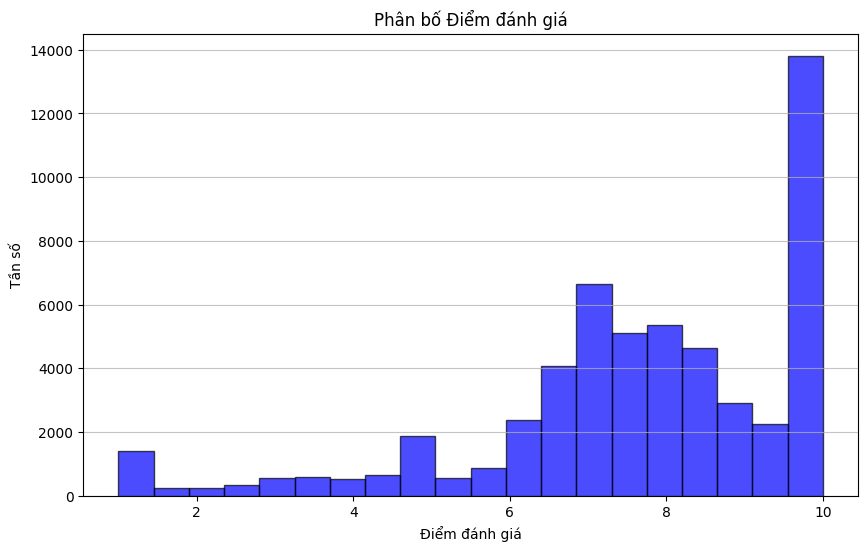

In [71]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.hist(df_clean_final["Điểm đánh giá"], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("Phân bố Điểm đánh giá")
plt.xlabel("Điểm đánh giá")
plt.ylabel("Tần số")
plt.grid(axis='y', alpha=0.75)

# Hiển thị biểu đồ
plt.show()



- Phân tích phân bố điểm đánh giá người dùng:

  - Phân bố điểm đánh giá lệch trái rõ rệt (left-skewed).
  - Phần lớn người dùng đánh giá ở mức cao (7–10), đặc biệt điểm 10 chiếm tần suất áp đảo.

- Nhận xét chính:

  - Điểm thấp (1–4) rất hiếm, cho thấy:
    - Người dùng có xu hướng chỉ đánh giá khi hài lòng.
    - Phản ánh thiên hướng đánh giá tích cực phổ biến.
  - Điểm 5 và 6 có tần suất nhô lên ở một vài mốc bất thường:
    - Có thể là giá trị mặc định trong hệ thống.
    - Hoặc do một nhóm người dùng cụ thể tạo ra.
  - Các điểm thấp xuất hiện lác đác có thể là spam, lỗi nhập liệu, hoặc khác biệt trong định dạng dữ liệu.


In [72]:
df_clean_final.to_csv("User đánh giá quán ăn.csv", index=False, encoding='utf-8-sig')
